In [30]:
import numpy as np
import matplotlib.pyplot as plt
import fuzzylite as fl

In [31]:
engine = fl.Engine(
    name="WashingMachineWaterUsage",
    description="Zużycie wody przez pralkę automatyczną",
    input_variables=[
        fl.InputVariable(
            name="masa_wsadu",
            description="Masa wsadu [kg]]",
            minimum=1.0,
            maximum=8.0,
            lock_range=False,
            terms=[
                fl.Triangle("niska", 1.0, 1.0, 3.0),
                fl.Triangle("srednia", 2.0, 5.0, 7.0),
                fl.Triangle("wysoka", 6.0, 8.0, 8.0)
            ]
        ),
        fl.InputVariable(
            name="stopien_zabrudzenia",
            description="Stopień zabrudzenia ubrań",
            minimum=0.0,
            maximum=1.0,
            lock_range=False,
            terms=[
                fl.Triangle("czyste", 0.0, 0.0, 0.2),
                fl.Triangle("lekko_zabrudzone", 0.1, 0.3, 0.5),
                fl.Triangle("brudne", 0.4, 0.6, 0.8),
                fl.Triangle("bardzo_brudne", 0.7, 1.0, 1.0)
            ]
        )
    ],
    output_variables=[
        fl.OutputVariable(
            name="zuzycie_wody",
            description="Zużycie wody w litrach",
            minimum=35.0,
            maximum=80.0,
            lock_range=False,
            aggregation=fl.Maximum(),
            defuzzifier=fl.Centroid(100),
            terms=[
                fl.Triangle("male", 35.0, 35.0, 50.0),
                fl.Triangle("srednie", 40.0, 57.5, 75.0),
                fl.Triangle("duze", 60.0, 80.0, 80.0)
            ]
        )
    ],
    rule_blocks=[
        fl.RuleBlock(
            name="rules",
            conjunction=fl.Minimum(),
            disjunction=None,
            implication=fl.AlgebraicProduct(),
            activation=fl.General(),
            rules=[
                fl.Rule.create("if masa_wsadu is niska and stopien_zabrudzenia is czyste then zuzycie_wody is male"),
                fl.Rule.create("if masa_wsadu is niska and stopien_zabrudzenia is lekko_zabrudzone then zuzycie_wody is male"),
                fl.Rule.create("if masa_wsadu is niska and stopien_zabrudzenia is brudne then zuzycie_wody is srednie"),
                fl.Rule.create("if masa_wsadu is niska and stopien_zabrudzenia is bardzo_brudne then zuzycie_wody is srednie"),
                
                fl.Rule.create("if masa_wsadu is srednia and stopien_zabrudzenia is czyste then zuzycie_wody is male"),
                fl.Rule.create("if masa_wsadu is srednia and stopien_zabrudzenia is lekko_zabrudzone then zuzycie_wody is srednie"),
                fl.Rule.create("if masa_wsadu is srednia and stopien_zabrudzenia is brudne then zuzycie_wody is srednie"),
                fl.Rule.create("if masa_wsadu is srednia and stopien_zabrudzenia is bardzo_brudne then zuzycie_wody is duze"),
                
                fl.Rule.create("if masa_wsadu is wysoka and stopien_zabrudzenia is czyste then zuzycie_wody is srednie"),
                fl.Rule.create("if masa_wsadu is wysoka and stopien_zabrudzenia is lekko_zabrudzone then zuzycie_wody is srednie"),
                fl.Rule.create("if masa_wsadu is wysoka and stopien_zabrudzenia is brudne then zuzycie_wody is duze"),
                fl.Rule.create("if masa_wsadu is wysoka and stopien_zabrudzenia is bardzo_brudne then zuzycie_wody is duze")
            ]
        )
    ]
)


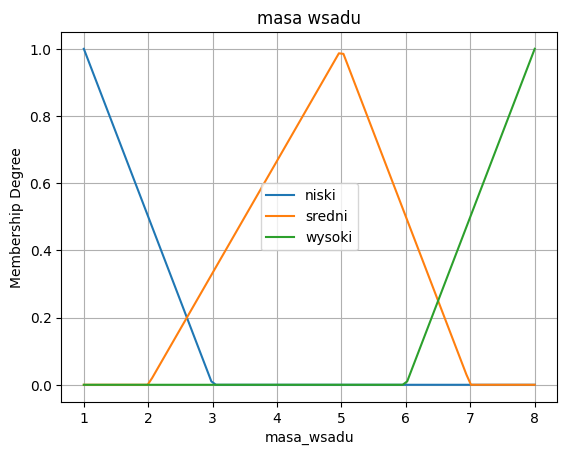

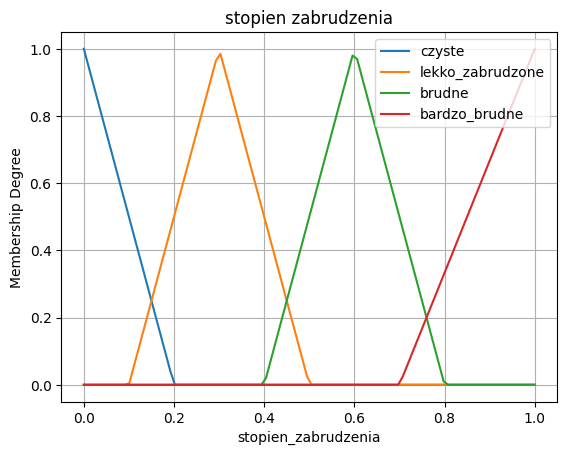

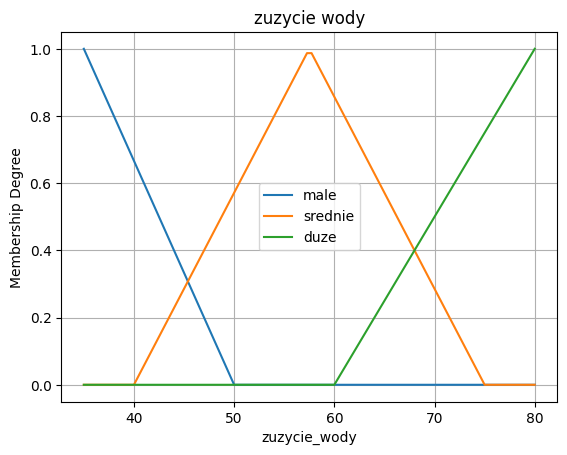

In [32]:
# Funkcja do rysowania wykresów funkcji przynależności
def plot_membership_functions(variable, title):
    x_values = np.linspace(variable.minimum, variable.maximum, 100)
    plt.figure()
    for term in variable.terms:
        y_values = [term.membership(x) for x in x_values]
        plt.plot(x_values, y_values, label=term.name)
    plt.title(title)
    plt.xlabel(variable.name)
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

# Rysowanie funkcji przynależności dla zmiennych wejściowych i wyjściowych
plot_membership_functions(engine.input_variable("masa_wsadu"), "masa wsadu")
plot_membership_functions(engine.input_variable("stopien_zabrudzenia"), "stopien zabrudzenia")
plot_membership_functions(engine.output_variable("zuzycie_wody"), "zuzycie wody")

In [33]:
# Przypadek 1
engine.input_variable("masa_wsadu").value = 7
engine.input_variable("stopien_zabrudzenia").value = 0.25

engine.process()
print('Przypadek 1: Zużycie wody =', engine.output_variable("zuzycie_wody").value)

Przypadek 1: Zużycie wody = 57.49999999999999


In [34]:
# Przypadek 2
engine.input_variable("masa_wsadu").value = 8.0
engine.input_variable("stopien_zabrudzenia").value = 1.0
engine.process()
print('Przypadek 2: Zużycie wody =', engine.output_variable("zuzycie_wody").value)

Przypadek 2: Zużycie wody = 73.33298267326734
